# Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto
#### Submitted by Olga Fernandez Solivan

### For this assignment I explored, segemented and clustered the neighborhoods in the city of Toronto. Before we I the data to start exploring it, I need to install and import all the libraries that I will need.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests; see guidance in https://requests.readthedocs.io/en/master/user/quickstart/ 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 10.7 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=18be4c87113238e6c43faf34a25a19dd587b5279040073fe1c6927ab2762aa02
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


### Use Request to get the Wikipedia Webpage

In [92]:
Toronto_data = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
Toronto_City_Data = requests.get(Toronto_data)

### Convert table from html into a pandas dataframe

In [93]:
df_TCD_Original = pd.read_html(Toronto_City_Data.content, header=0)[0]
df_TCD_Original

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [94]:
df_TCD_Original.shape

(180, 3)

### Drop rows with "Not assigned" in the Borough Columns 

In [95]:
df_TCD_Clean_1 = df_TCD_Original[df_TCD_Original.Borough !='Not assigned'].reset_index(drop=True)
df_TCD_Clean_1.head(15) 

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### For cells with a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [31]:
#Locate the cells with a borough and a "Not assigned" neighborhood.
df_TCD_Clean_1.loc[df_TCD_Clean_1.Neighbourhood == 'Not assigned']

,Postal Code,Borough,Neighbourhood


In [32]:
#Replace the "Not assigned" with the Borough
df_TCD_Clean_2 = df_TCD_Clean_1.groupby(['Postal Code','Borough'], as_index=False).agg(lambda x: ','.join(x))
df_TCD_Clean_2

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Print Number of Rows with Shape Method

In [96]:
df_TCD_Clean_2.shape

(103, 3)

### Upload to GitHub and Submit this Notebook to Complete Submission 1. In Github these changes were recorded under commit 5cfbb1f
https://github.com/OlgaMFS/Coursera_Capstone/commit/5cfbb1f4cf59ab3c21e0ed9b975b50b2d12090ac

### Upload to GitHub and Submit this Notebook to Complete Submission 1. For Submission 2, to utilize the Foursquare location data, I need to get the latitude and the longitude coordinates of each neighborhood with the Geocoder Python package: https://geocoder.readthedocs.io/index.html![image-2.png](attachment:image-2.png). 
	
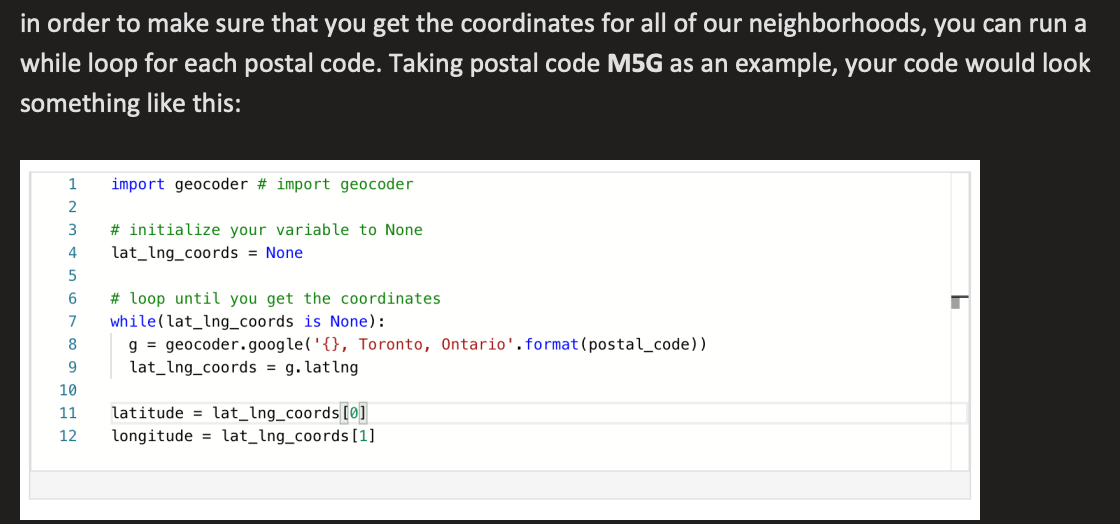


### Geopackage didn't complete

#initialize your variable to None
lat_lng_coords = None

#loop until you get the coordinates
while(lat_lng_coord is None):
    g=geocoder.google('{},Toronto, Ontario'.format(postal_code))
    lat_lng_coords=g.latlng
    
latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

#### Just in case I don't get to have the coordinates with the geocoder package, I downloaded the link provided for submission 2 to a csv file called "TCCoord.csv" that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

In [97]:
!wget -O TCCoord.csv https://cocl.us/Geospatial_data

--2021-01-18 20:33:12--  https://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.63.96.176, 169.63.96.194
Connecting to cocl.us (cocl.us)|169.63.96.176|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2021-01-18 20:33:13--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.29.197
Connecting to ibm.box.com (ibm.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2021-01-18 20:33:13--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]


In [98]:
TC_Coord = pd.read_csv("TCCoord.csv", delimiter=",")
TC_Coord [0:5]

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Add Coordinates to Pandas database

#### First check that both tables have the same shape

In [99]:
TC_Coord.shape

(103, 3)

#### Since the shapes of TC-Coord and df_TCD_Clean_2 are the same, I can join both tables and create a new database smilar to the one requested for submission 2 

In [100]:
df_TCD_Clean_3 = df_TCD_Clean_2.join(TC_Coord.set_index('Postal Code'), on ='Postal Code')

In [101]:
df_TCD_Clean_3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Submit this Notebook to Github again

#### The changes for this commit were recorded under commit 804e68c 
https://github.com/OlgaMFS/Coursera_Capstone/commit/804e68c698a451b61a1b296d666b44097e47acbf

### Submission 3: Explore and cluster the neighborhoods in Toronto.

#### Create a new database with the boroughs that include the word "Toronto"

In [102]:
df_TCD_Clean_4 = df_TCD_Clean_3[df_TCD_Clean_3['Borough'].str.contains('Toronto',regex=False)].reset_index(drop=True)
df_TCD_Clean_4

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


### Visualization of the Neighbourhoods in the City of Toronto

In [103]:
#Define latitude and longitude with geocoder for the City of Toronto City Hall
address='100 Queen St. W. Toronto, ON M5H 2N2' ##I found this address in this webpae: https://www.toronto.ca/home/contact-us/
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
print(location)

Toronto City Hall, 100, Queen Street West, Financial District, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5H 2N2, Canada


In [104]:
latitude=location.latitude
longitude=location.longitude
print(latitude,longitude)

43.6536032 -79.38400547469666


In [105]:
#Create first map
TCN_map = folium.Map(location=[latitude, longitude], zoom_start=10)

#display map
TCN_map

In [106]:
#add a marker to identify the Toronto City Hall
folium.CircleMarker(
    [latitude,longitude],
    radius=10,
    color='red',
    popup='Toronto City Hall',
    fill=True,
    fill_color='blue',
    fill_opacy=0.6
).add_to(TCN_map)
TCN_map

In [107]:
#identify the Neigbourhoods with a blue marker
TCN_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat,lng,borough,neighbourhood in zip(df_TCD_Clean_4['Latitude'],df_TCD_Clean_4['Longitude'],df_TCD_Clean_4['Borough'],df_TCD_Clean_4['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.7,
    parse_html=False).add_to(TCN_map)

TCN_map

### Visually I was able to identify four clusters as shown below:
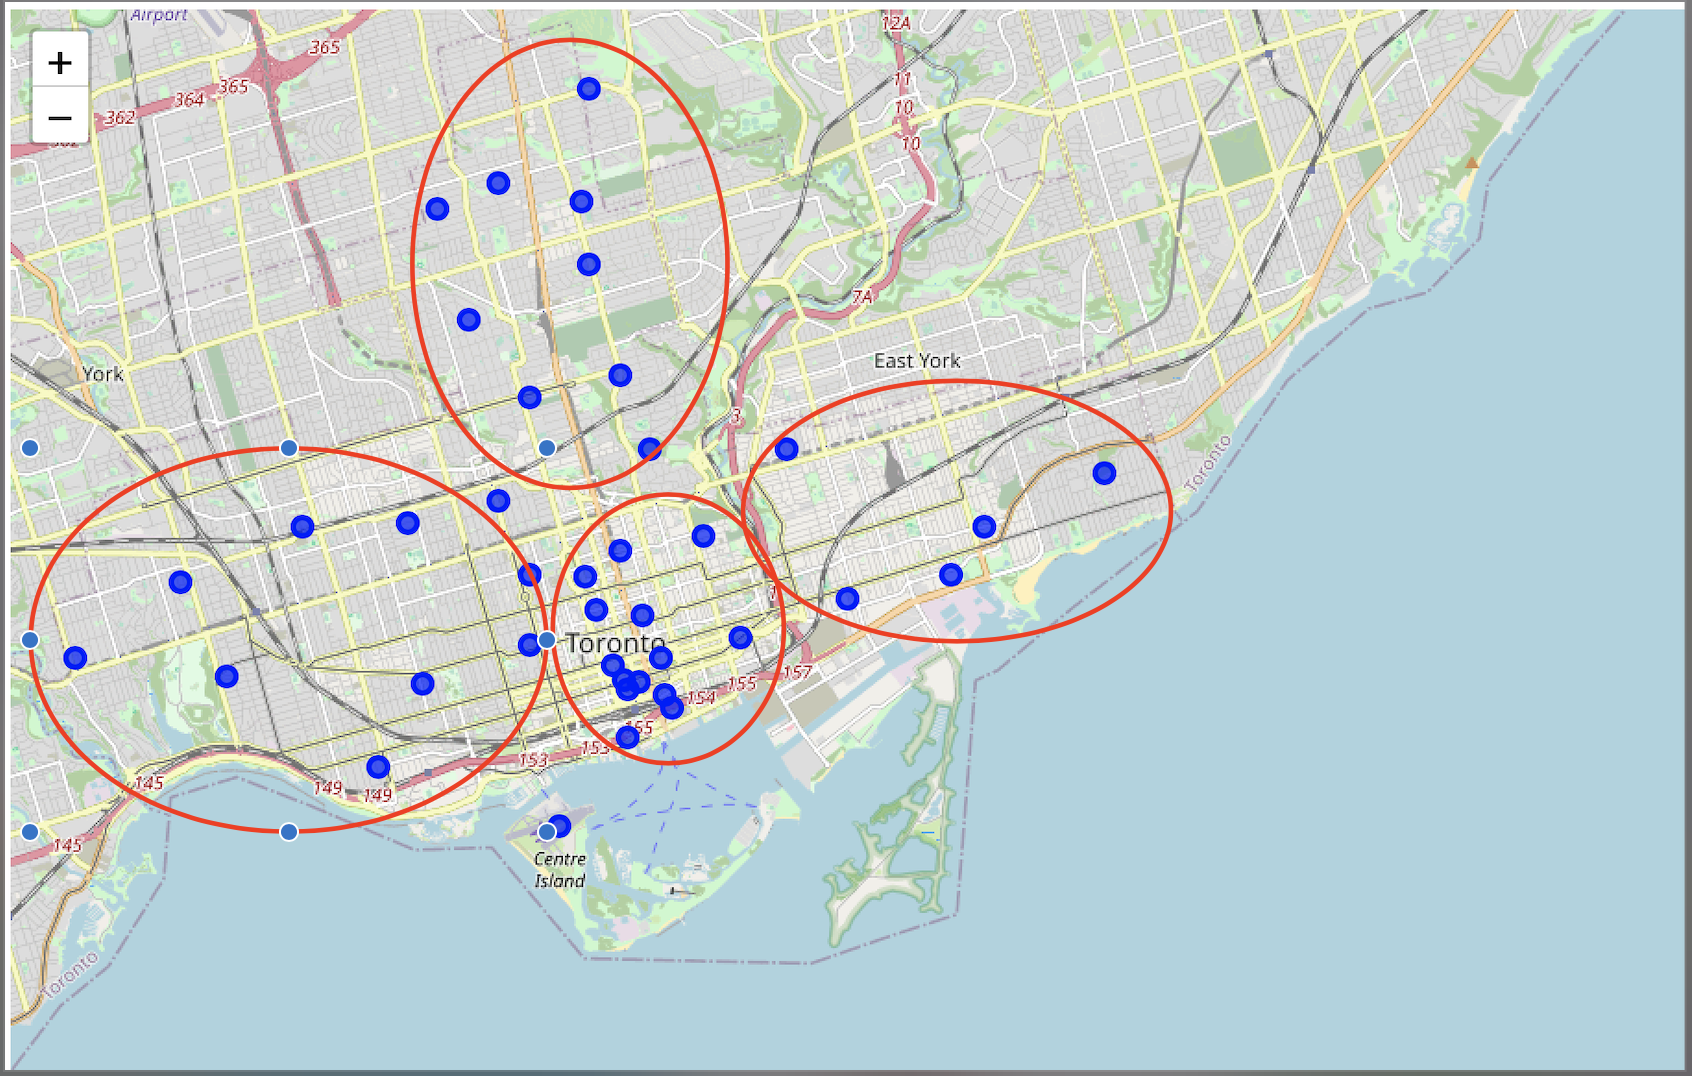

#### Therefore, I'm going to run k-means to cluster the neighborhood into 5 clusters

In [108]:
# set number of clusters
kclusters = 4
Toronto_grouped_clustering=df_TCD_Clean_4.drop(['Postal Code','Borough','Neighbourhood'],1)

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

#List the cluster labels generated for each row in df_TCD_Clean_4.
kmeans.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1], dtype=int32)

### Next, I'm going to create a new database with the clustering labels

In [109]:
df_TCD_Clean_4

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [110]:
# create new database with clusters
df_TCD_Clean_4.insert(0,'Cluster Labels',kmeans.labels_)

In [111]:
df_TCD_Clean_4.head()

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,1,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,1,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,1,M4M,East Toronto,Studio District,43.659526,-79.340923
4,2,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [114]:
# create map
TC_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_TCD_Clean_4['Latitude'], df_TCD_Clean_4['Longitude'], df_TCD_Clean_4['Neighbourhood'], df_TCD_Clean_4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(TC_map_clusters)
       
TC_map_clusters

### After examining the TC_map_clusters, I identified 

In [117]:
df_TCD_Clean_4.head()

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,1,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,1,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,1,M4M,East Toronto,Studio District,43.659526,-79.340923
4,2,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [132]:
df_TCD_Clean_4.loc[df_TCD_Clean_4['Cluster Labels'] == 0, df_TCD_Clean_4.columns[[1] + list(range(2, df_TCD_Clean_4.shape[1]))]]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
30,M6G,Downtown Toronto,Christie,43.669542,-79.422564
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
32,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
33,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
34,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763
35,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325
36,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450


In [127]:
df_TCD_Clean_4.loc[df_TCD_Clean_4['Cluster Labels'] == 1, df_TCD_Clean_4.columns[[1] + list(range(2, df_TCD_Clean_4.shape[1]))]]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
38,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558


In [128]:
df_TCD_Clean_4.loc[df_TCD_Clean_4['Cluster Labels'] == 2, df_TCD_Clean_4.columns[[1] + list(range(2, df_TCD_Clean_4.shape[1]))]]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
22,M5N,Central Toronto,Roselawn,43.711695,-79.416936
23,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307


In [129]:
df_TCD_Clean_4.loc[df_TCD_Clean_4['Cluster Labels'] == 3, df_TCD_Clean_4.columns[[1] + list(range(2, df_TCD_Clean_4.shape[1]))]]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
10,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
11,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
12,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
13,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
14,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
16,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
17,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
18,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
19,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752


In [130]:
df_TCD_Clean_4.loc[df_TCD_Clean_4['Cluster Labels'] == 4, df_TCD_Clean_4.columns[[1] + list(range(2, df_TCD_Clean_4.shape[1]))]]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude


# In conclusion, I noticed that the City of Toronto has the following four Boroughs and that the first two letters of the Postal Codes for these Boroughs Start with M4 and end with M7: 



|Cluster Numbers|Boroughs        |Postal Codes-First 2 Letters|
|---------------|----------------|----------------------------|
|0              |West Toronto    |M6                          |
|1              |East Toronto    |M4, M7                      |
|2              |Central Toronto |M4, M5                      |
|3              |Downtown Toronto|M4, M5, M7                  |
